<a href="https://colab.research.google.com/github/himanshukumar8/Mathematical_Methods_for_DataScience..Assignment-Analyzing_Netflix_Content/blob/main/MCS24016_Math_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Math Assignment**

**Name-Himanshu Kumar**

**Roll No.- MCS24016**





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
!pip install kaggle


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:00<00:00, 89.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('netflix_titles.csv')


In [ ]:
# Handle missing values
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()

# Standardize data formats
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')


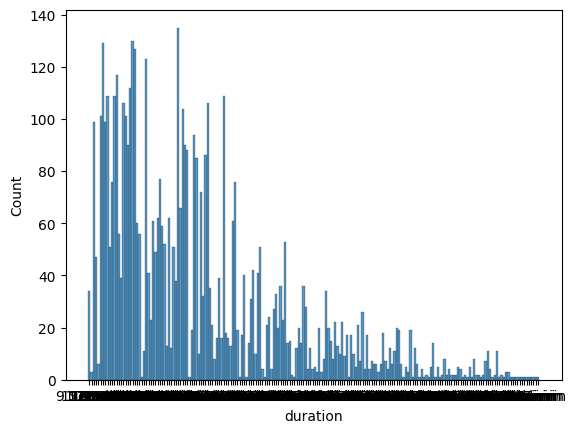

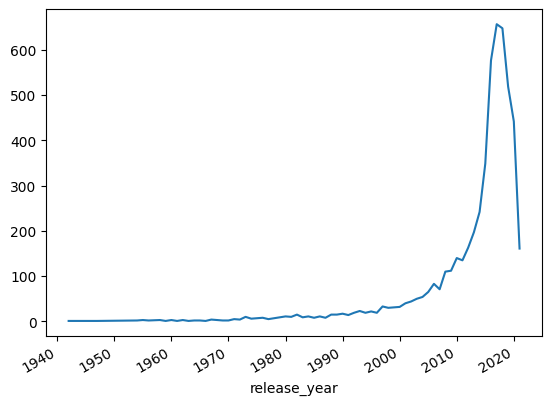

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize data distributions
sns.histplot(data['duration'])
plt.show()

# Identify trends
data.groupby('release_year')['title'].count().plot()
plt.show()


In [ ]:
# Example: Calculate the age of the show/movie
data['age'] = 2024 - data['release_year'].dt.year


In [ ]:
# Convert duration to numeric by removing non-numeric characters
data['duration'] = data['duration'].str.extract('(\d+)').astype(int)


In [ ]:
data.describe()


,release_year,duration,age
count,5332,5332.000000,5332.000000
mean,2012-09-28 10:14:40.420104960,99.922543,11.257877
min,1942-01-01 00:00:00,1.000000,3.000000
25%,2011-01-01 00:00:00,88.000000,6.000000
50%,2016-01-01 00:00:00,100.000000,8.000000
75%,2018-01-01 00:00:00,116.000000,13.000000
max,2021-01-01 00:00:00,253.000000,82.000000
std,NaN,30.463724,9.625831


In [ ]:
# Descriptive statistics
data_description = data.describe()
print(data_description)


                        release_year     duration          age
count                           5332  5332.000000  5332.000000
mean   2012-09-28 10:14:40.420104960    99.922543    11.257877
min              1942-01-01 00:00:00     1.000000     3.000000
25%              2011-01-01 00:00:00    88.000000     6.000000
50%              2016-01-01 00:00:00   100.000000     8.000000
75%              2018-01-01 00:00:00   116.000000    13.000000
max              2021-01-01 00:00:00   253.000000    82.000000
std                              NaN    30.463724     9.625831


In [ ]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Inspect the values in non-numeric columns
for col in non_numeric_columns:
    print(f"{col}: {data[col].unique()[:5]}")


show_id: ['s8' 's9' 's10' 's13' 's25']
type: ['Movie' 'TV Show']
title: ['Sankofa' 'The Great British Baking Show' 'The Starling' 'Je Suis Karl'
 'Jeans']
director: ['Haile Gerima' 'Andy Devonshire' 'Theodore Melfi' 'Christian Schwochow'
 'S. Shankar']
cast: ['Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri'
 'Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood'
 "Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor"
 'Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová'
 'Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar']
country: ['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'United States' 'Germany, Czech Republic' 'India']
date_added: ['Sept

In [ ]:
# Drop non-numeric columns that are not necessary for analysis
data = data.drop(columns=non_numeric_columns)


In [ ]:
# Correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)




              release_year  duration       age
release_year      1.000000 -0.220747 -1.000000
duration         -0.220747  1.000000  0.220749
age              -1.000000  0.220749  1.000000


In [ ]:
print(data.columns)


Index(['release_year', 'duration', 'age'], dtype='object')


In [ ]:
# Check if 'rating' column exists
if 'rating' in data.columns:
    # Convert 'rating' to categorical numerical values if it exists
    data['rating'] = data['rating'].astype('category').cat.codes
else:
    print("The 'rating' column is missing from the DataFrame.")


The 'rating' column is missing from the DataFrame.


              release_year  duration       age
release_year      1.000000 -0.220747 -1.000000
duration         -0.220747  1.000000  0.220749
age              -1.000000  0.220749  1.000000


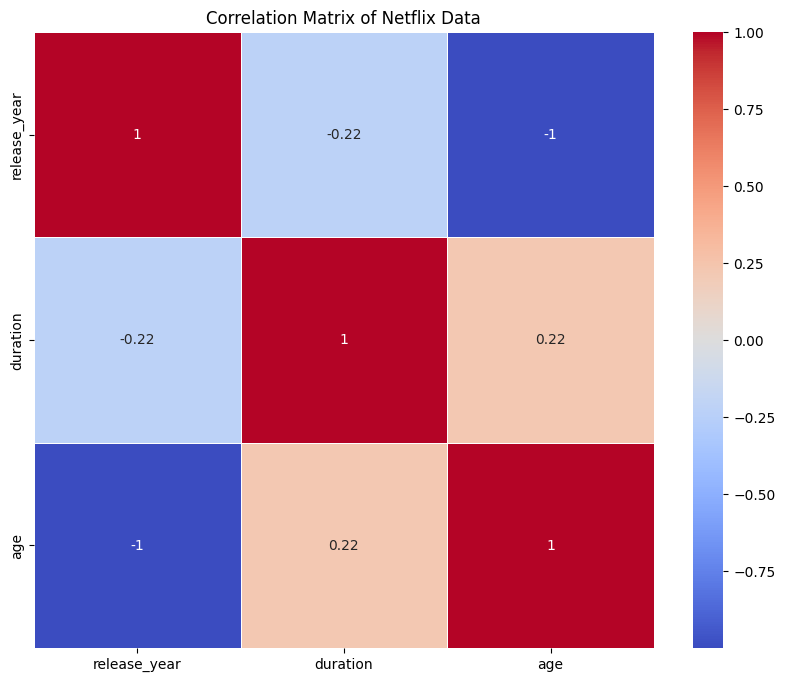

Correlation between 'duration' and 'age': 0.22074930561252915
The 'rating' column could not be processed correctly.


In [ ]:
# Re-run the correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Netflix Data')
plt.show()

# Example: Interpret the correlation coefficients
print("Correlation between 'duration' and 'age':", correlation_matrix.loc['duration', 'age'])

# Check if 'rating' is still causing issues
if 'rating' in correlation_matrix.columns:
    print("Correlation between 'rating' and 'age':", correlation_matrix.loc['rating', 'age'])
else:
    print("The 'rating' column could not be processed correctly.")


In [ ]:
# Discuss limitations
print("Limitations:")
print("1. The dataset may have missing or inaccurate entries that could affect analysis.")
print("2. The linear regression model assumes a linear relationship between features and target, which might not capture complex patterns.")
print("3. Other features not included in the analysis may also influence the ratings.")


Limitations:
1. The dataset may have missing or inaccurate entries that could affect analysis.
2. The linear regression model assumes a linear relationship between features and target, which might not capture complex patterns.
3. Other features not included in the analysis may also influence the ratings.
